# Crime Analysis in Los Angeles

## Introduction

This is a comprehensive Exploratory Data Analysis for the Crime in Los Angeles 2019-2023 

The purpose of this projects include:

1. Exploring crime statistics that provide information about the dynamics of cities and the pattern of criminal activity.
2. Demonstrating the frequency of crimes in Los Angeles crime incidents over the years, months, and days to  identify  when or where crimes tend to occur most frequently.
3. Analyzing crime during the period to identify trends and patterns in criminal activity to understand crime rates increasing, decreasing, or stabilizing in different areas.

   


## Data

Datasouce: https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8

Records the data begin in January 1, 2019 and continue to May 6, 2023.

## Tool

Jupyter Notebook and Python version3

# 1. Data Acquisition

### Data Loading ##

In [1]:
# import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read csv file
df = pd.read_csv("Crime_LA_2019_present.csv")

### Data Exploration

In [3]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [4]:
df.shape

(968833, 28)

In [5]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968833 entries, 0 to 968832
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           968833 non-null  int64  
 1   Date Rptd       968833 non-null  object 
 2   DATE OCC        968833 non-null  object 
 3   TIME OCC        968833 non-null  int64  
 4   AREA            968833 non-null  int64  
 5   AREA NAME       968833 non-null  object 
 6   Rpt Dist No     968833 non-null  int64  
 7   Part 1-2        968833 non-null  int64  
 8   Crm Cd          968833 non-null  int64  
 9   Crm Cd Desc     968833 non-null  object 
 10  Mocodes         844158 non-null  object 
 11  Vict Age        968833 non-null  int64  
 12  Vict Sex        850889 non-null  object 
 13  Vict Descent    850880 non-null  object 
 14  Premis Cd       968820 non-null  float64
 15  Premis Desc     968317 non-null  object 
 16  Weapon Used Cd  337873 non-null  float64
 17  Weapon Des

In [7]:
df.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,9.688330e+05,968833.000000,968833.000000,968833.000000,968833.000000,968833.000000,968833.000000,968820.000000,337873.000000,968823.000000,71685.000000,2367.000000,67.000000,968833.000000,968833.000000
mean,2.095070e+08,1338.717059,10.735398,1119.933727,1.418786,502.570342,30.334692,305.797799,364.949990,502.297246,954.368055,982.301648,990.029851,33.993965,-118.076692
std,1.321702e+07,652.216314,6.093403,609.375151,0.493361,208.396044,21.595784,216.538681,121.314258,208.173283,116.073608,56.576853,28.723852,1.651870,5.725666
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-4.000000,101.000000,101.000000,110.000000,210.000000,434.000000,821.000000,0.000000,-118.667600
25%,2.003218e+08,900.000000,6.000000,622.000000,1.000000,330.000000,15.000000,102.000000,312.000000,330.000000,998.000000,998.000000,998.000000,34.013200,-118.429700
50%,2.108162e+08,1415.000000,11.000000,1143.000000,1.000000,442.000000,31.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.000000,34.058700,-118.322200
75%,2.210087e+08,1900.000000,16.000000,1621.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.000000,34.164900,-118.273900
max,2.399165e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,973.000000,516.000000,956.000000,999.000000,999.000000,999.000000,34.334300,0.000000


# 2. Data Preprocessing and Cleaning

In [8]:
# Convert string 'DATE OCC' to datetime
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

# Split 'DATE OCC' into YEAR OCC, MONTH OCC and DAY OCC
df['YEAR_OCC'] = df['DATE OCC'].dt.year
df['MONTH_OCC'] = df['DATE OCC'].dt.month
df['DAY_OCC'] = df['DATE OCC'].dt.day

In [9]:
# Convert int 'TIME OCC' to datetime
df['TIME OCC'] = df['TIME OCC'].astype(str).str.zfill(4)
df['TIME OCC'] = pd.to_datetime(df['TIME OCC'], format = '%H%M').dt.strftime('%H:%M')

In [10]:
# Drop column that we don't use
df.drop(['Date Rptd', 'Part 1-2', 'Mocodes', 'Crm Cd 1','Crm Cd 2', 'Crm Cd 3', 
         'Crm Cd 4', 'Cross Street', 'AREA', 'Status',  'Weapon Used Cd', 'Premis Cd', 
         'Rpt Dist No', 'Crm Cd'], axis= 1, inplace= True)

In [11]:
# Rename the columns
df = df.rename(columns = {'DATE OCC': 'DATE_OCC', 'TIME OCC': 'TIME_OCC', 'AREA NAME': 'Area',
                          'Crm Cd Desc': 'CRM', 'Premis Desc': 'Premis','Weapon Desc': 'Weapon', 
                          'Status Desc': 'Status', 'LOCATION': 'Location','Vict Age': 'Vict_Age', 
                          'Vict Sex':'Vict_Sex','Vict Descent': 'Vict_Descent'})

In [12]:
# Relocate the columns
df = df[['DR_NO', 'DATE_OCC', 'YEAR_OCC', 'MONTH_OCC', 'DAY_OCC', 'TIME_OCC', 'Area','CRM', 
         'Vict_Age', 'Vict_Sex', 'Vict_Descent','Premis', 'Weapon', 'Status', 'Location', 'LAT', 'LON']]
df.head()

,DR_NO,DATE_OCC,YEAR_OCC,MONTH_OCC,DAY_OCC,TIME_OCC,Area,CRM,Vict_Age,Vict_Sex,Vict_Descent,Premis,Weapon,Status,Location,LAT,LON
0,10304468,2020-01-08,2020,1,8,22:30,Southwest,BATTERY - SIMPLE ASSAULT,36,F,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,1100 W 39TH PL,34.0141,-118.2978
1,190101086,2020-01-01,2020,1,1,03:30,Central,BATTERY - SIMPLE ASSAULT,25,M,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S HILL ST,34.0459,-118.2545
2,200110444,2020-02-13,2020,2,13,12:00,Central,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,POLICE FACILITY,NaN,Adult Arrest,200 E 6TH ST,34.0448,-118.2474
3,191501505,2020-01-01,2020,1,1,17:30,N Hollywood,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019
4,191921269,2020-01-01,2020,1,1,04:15,Mission,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,BEAUTY SUPPLY STORE,NaN,Invest Cont,14400 TITUS ST,34.2198,-118.4468


In [13]:
# Check the duplicates 
df.duplicated().sum()

20803

In [14]:
# Identify the duplicate rows
df.loc[df.duplicated()].head()

,DR_NO,DATE_OCC,YEAR_OCC,MONTH_OCC,DAY_OCC,TIME_OCC,Area,CRM,Vict_Age,Vict_Sex,Vict_Descent,Premis,Weapon,Status,Location,LAT,LON
697243,220506125,2022-02-24,2022,2,24,08:00,Harbor,VEHICLE - STOLEN,0,NaN,NaN,STREET,NaN,Invest Cont,1600 TORRANCE BL,33.8398,-118.3067
704279,222005934,2022-02-11,2022,2,11,17:00,Olympic,VEHICLE - STOLEN,0,NaN,NaN,STREET,NaN,Invest Cont,500 S MARIPOSA AV,34.0654,-118.2992
735440,220911261,2022-07-07,2022,7,7,19:15,Van Nuys,BURGLARY,0,X,X,MEDICAL/DENTAL OFFICES,NaN,Invest Cont,4500 N SEPULVEDA BL,34.1517,-118.4671
735460,231004191,2022-12-25,2022,12,25,17:00,West Valley,VEHICLE - STOLEN,0,NaN,NaN,STREET,NaN,Invest Cont,LINDLEY AV,34.1806,-118.5273
735462,221406950,2022-02-28,2022,2,28,22:00,Pacific,INTIMATE PARTNER - SIMPLE ASSAULT,39,M,B,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,11800 ALLIN ST,33.9923,-118.4105


In [15]:
# Drop duplicates
df.drop_duplicates(keep = "first" ,inplace = True)

In [16]:
# Check the number of missing values
df.isnull().sum()

DR_NO                0
DATE_OCC             0
YEAR_OCC             0
MONTH_OCC            0
DAY_OCC              0
TIME_OCC             0
Area                 0
CRM                  0
Vict_Age             0
Vict_Sex        115466
Vict_Descent    115475
Premis             507
Weapon          616285
Status               0
Location             0
LAT                  0
LON                  0
dtype: int64

In [17]:
# Replace missing values in columns (Vict Sex, Vict Descent, and Weapon) with the value 'Unknown'
df[['Vict_Sex', 'Vict_Descent', 'Weapon']].fillna('Unknown', inplace = True)

In [18]:
# Check 0 and negative age values
df[df['Vict_Age'] <= 0]['Vict_Age'].value_counts()

Vict_Age
 0    220058
-1        44
-2        15
-3         2
-4         2
Name: count, dtype: int64

In [19]:
# Replace 0 and negative age values with NaN
df['Vict_Age'] = df['Vict_Age'].replace({0: np.nan, -1: np.nan, -2: np.nan, -3: np.nan, -4: np.nan})

# Replace NaN with the mean age
avg_age = df['Vict_Age'].mean()
df['Vict_Age'] = df['Vict_Age'].fillna(avg_age)

# 3.Data Exploration and Visualization

### Data Exploration and Visualization

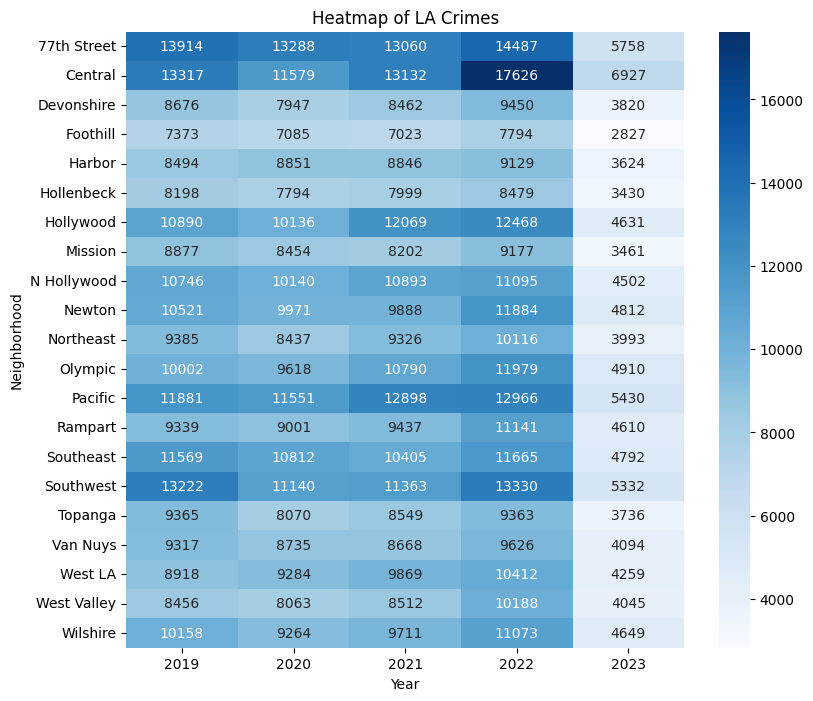

In [20]:
# Heatmap of LA
crime_by_area_year = df.pivot_table(index='Area', columns = 'YEAR_OCC', values = 'DR_NO', aggfunc = 'count', fill_value = 0)

plt.figure(figsize = (9, 8))
sns.heatmap(crime_by_area_year, cmap = 'Blues', annot = True, fmt = 'd', cbar = True)
plt.xlabel('Year')
plt.ylabel('Neighborhood')
plt.title('Heatmap of LA Crimes')
plt.show()

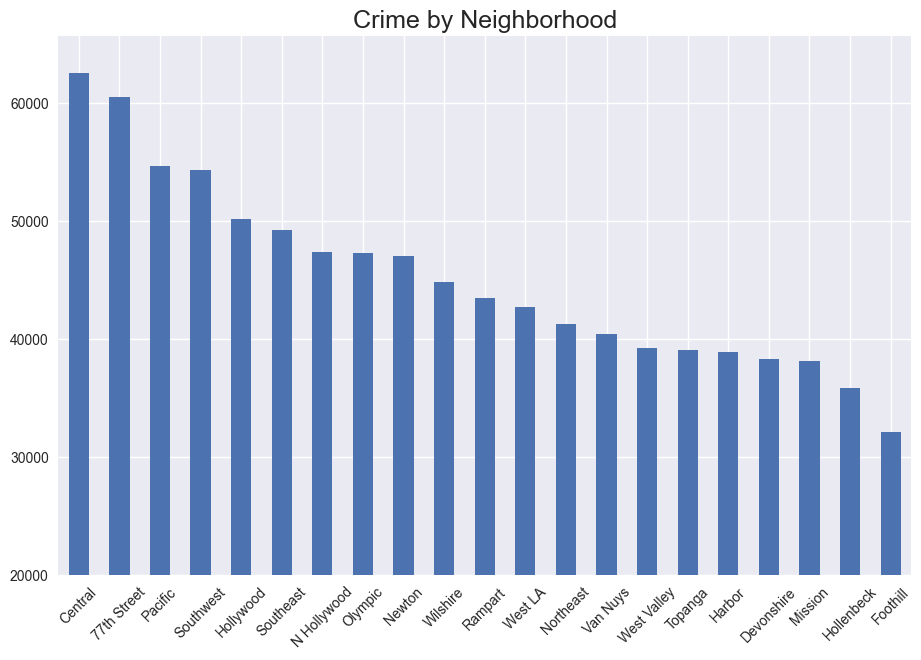

In [21]:
# Count crime in each area 
area_crime = df['Area'].value_counts()

plt.style.use('seaborn')
color = plt.cm.ocean(np.linspace(0, 2, 5))
area_crime.plot.bar(figsize = (11, 7))
plt.ylim(bottom = 20000)
plt.title('Crime by Neighborhood', fontsize = 18)
plt.xticks(rotation = 45)
plt.xlabel('')
plt.show()

From the plot above, the top 5 neighborhoods with the most crime is Central, 77th Street, Pacific, Southwest and Hollywood.

To summarize the crime trend for each year and area. We will examine the top 5 neighborhoods with the most crimes by filtering data that is in the top 5 neighborhoods and then grouping the data with the most crimes by YEAR OCC and Area.

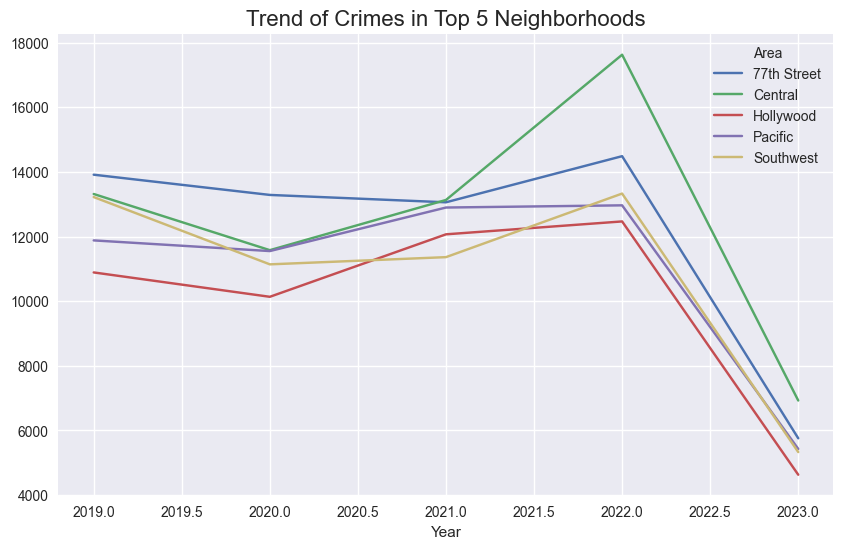

In [22]:
# Filter data that is in the top 5 areas
top5_areas = df['Area'].value_counts().nlargest(5).index
top5_areas_df = df[df['Area'].isin(top5_areas)]

# Group the data by year and area
group_df = top5_areas_df.groupby(['YEAR_OCC', 'Area']).size().reset_index(name ='Crime Count')

# Plot crimes in top 5 areas
plt.figure(figsize = (10, 6))
ax = sns.lineplot(data = group_df, x = 'YEAR_OCC', y = 'Crime Count', hue = 'Area')
ax.set_title('Trend of Crimes in Top 5 Neighborhoods', fontsize = 16)
ax.set_xlabel('Year')
ax.set_ylabel('')
plt.show()

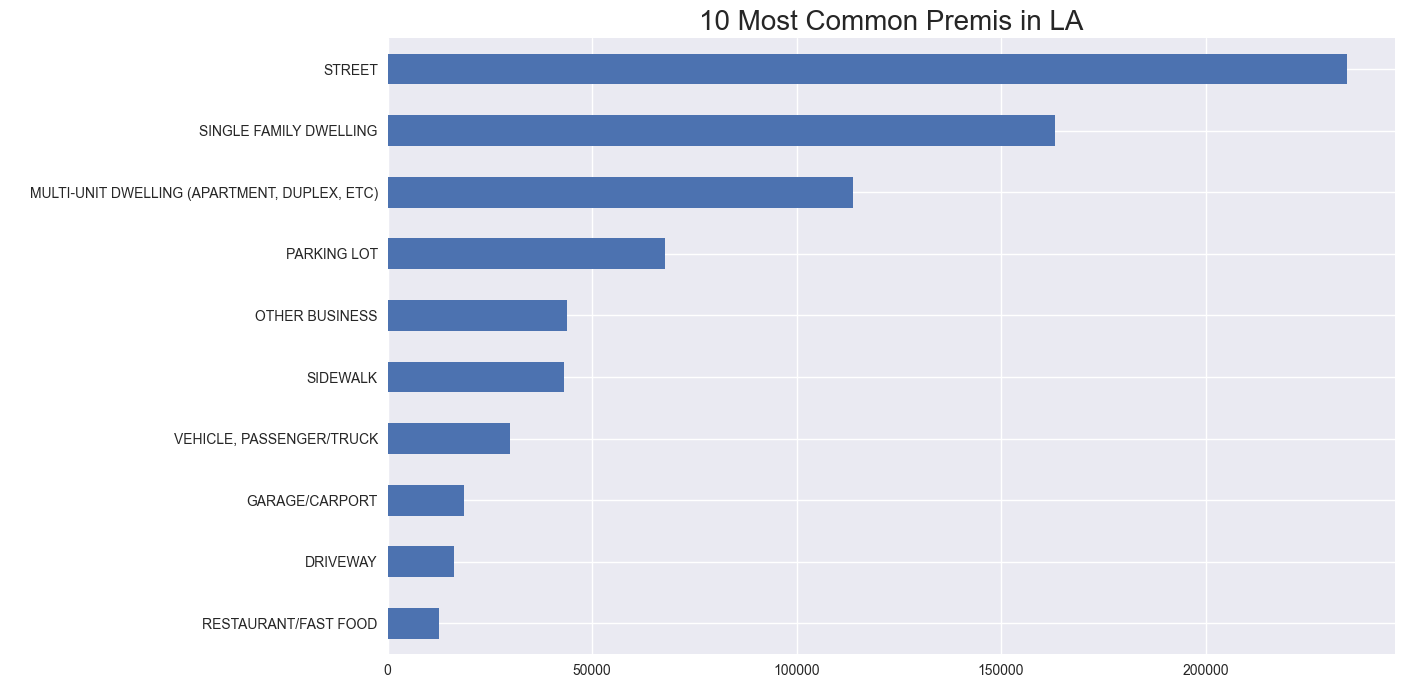

In [23]:
# Top 10 premise
top_premis = df['Premis'].value_counts().nlargest(10)

plt.style.use('seaborn')
color = plt.cm.ocean(np.linspace(0, 2, 5))
df['Premis'].value_counts().head(10).sort_values(ascending = True).plot.barh(figsize = (13, 8))
plt.title('10 Most Common Premis in LA', fontsize = 20)
plt.xticks()
plt.ylabel(' ')
plt.show()

From the plots above, they show some of the most common crimes in LA and the percentage that indicate the proportion of each crime in relation to the total count of the top 5 crimes:

   1. Vehicle - Stolen 27%
   2. Battery - Simple assault 22.1%
   3. Burglary from vehicle 17.8%
   4. Vandalism - Felony ($400 & over, all church vandalisms) 16.6%
   5. Burglary 16.4%

# 4. Temporal Analysis

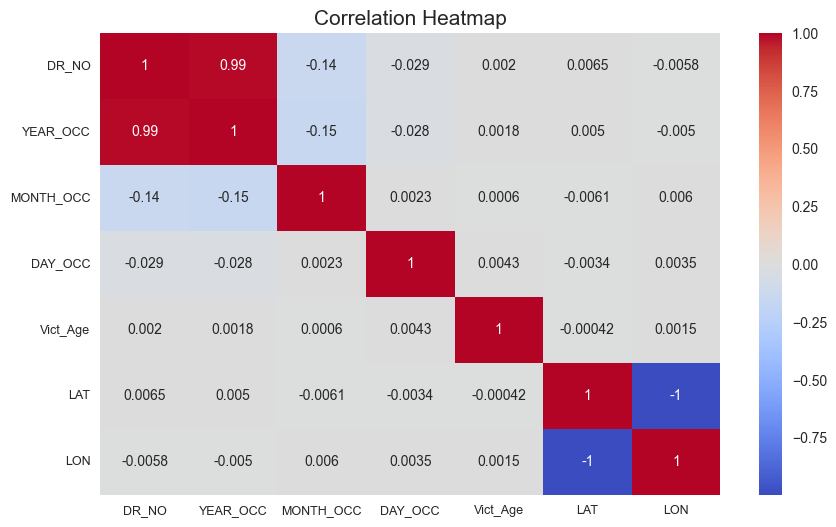

In [24]:
# Correlation Heatmap
numeric_columns = ['DR_NO', 'YEAR_OCC', 'MONTH_OCC', 'DAY_OCC', 'Vict_Age', 'LAT', 'LON']
correlation = df[numeric_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot= True, cmap = 'coolwarm')
plt.title('Correlation Heatmap', fontsize = 15)
plt.xticks(fontsize = 9)
plt.yticks(fontsize = 9)
plt.show()

In [25]:
# Group the crime by crm and year occ
crime_counts_by_year = df.groupby(['CRM', 'YEAR_OCC']).size().reset_index(name = 'Count')

# Create a table with columns = 'CRM' and rows= 'YEAR OCC'
crime_pivot_table = crime_counts_by_year.pivot(index = 'YEAR_OCC', columns = 'CRM', values = 'Count')

# Calculate the difference for each crime
crime_diff = crime_pivot_table.diff(axis = 0)

# Show overall changes
overall_changes = crime_diff.sum(axis = 0).sort_values(ascending = False)
overall_changes.to_frame()

,0
CRM,
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER),871.0
PICKPOCKET,306.0
"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)",247.0
FAILURE TO YIELD,20.0
"THEFT, COIN MACHINE - ATTEMPT",3.0
...,...
"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",-7461.0
INTIMATE PARTNER - SIMPLE ASSAULT,-7639.0
THEFT PLAIN - PETTY ($950 & UNDER),-10600.0


The table above shows about the difference for each crime

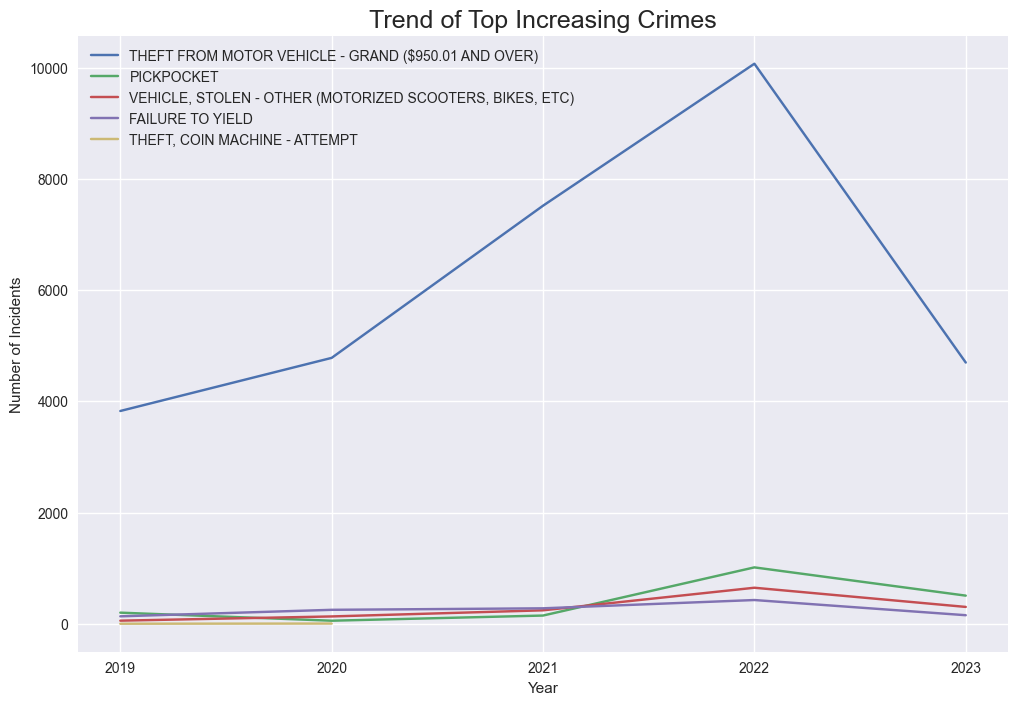

In [26]:
# Top increasing crimes
top_increasing_crimes = overall_changes.nlargest(5)

plt.figure(figsize=(12, 8))

# Plot the lines for increasing crimes
for col in top_increasing_crimes.index:
    plt.plot(crime_pivot_table.index.astype(int), crime_pivot_table[col], label=col)

plt.title('Trend of Top Increasing Crimes', fontsize = 18)
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.xticks(crime_pivot_table.index.astype(int))
plt.legend()
plt.show()

From the plot above, we can see the trend of top increasing Crimes, it is evident that the crime of theft from motor vehicle - grand ($950.01 and over) has the highest rate of any other crime every year.

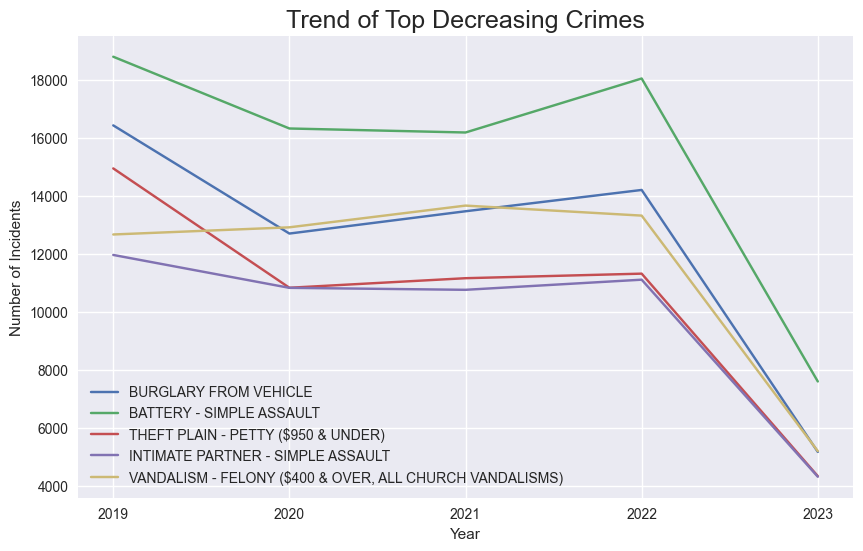

In [27]:
# Top decreasing crimes
top_decreasing_crimes = overall_changes.nsmallest(5)

plt.figure(figsize=(10, 6))

# Plot the lines for decreasing crimes
for col in top_decreasing_crimes.index:
    plt.plot(crime_pivot_table.index.astype(int), crime_pivot_table[col], label=col)

# Set title and labels
plt.title('Trend of Top Decreasing Crimes', fontsize = 18)
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.xticks(crime_pivot_table.index.astype(int))
plt.legend()
plt.show()

From the plot above, it shows the trend of top 5 decreasing crimes:

   1. Burglary from vehicle
   2. Battery - simple assault
   3. Theft plain - petty ($950 & under)
   4. Intimate partner - simple assault
   
   5. Vadalism - felony ($400 & over, all church vandalisms)

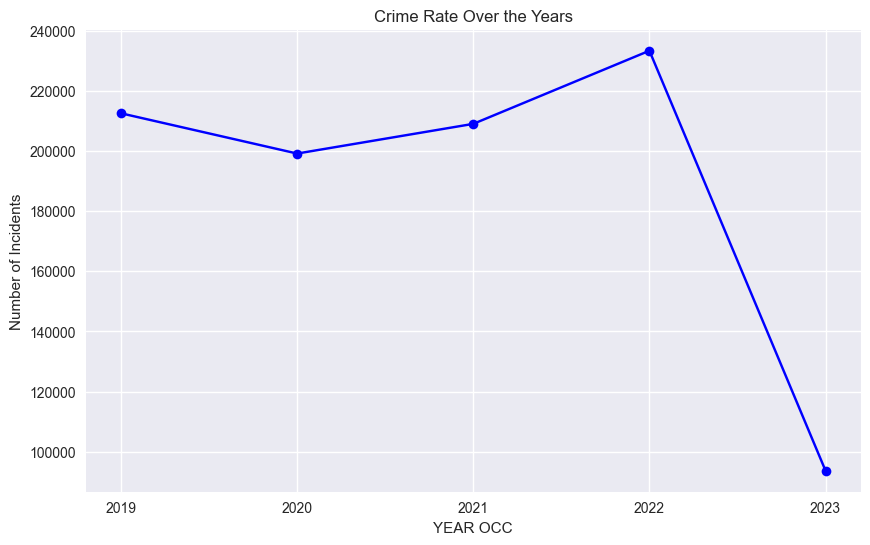

In [28]:
# Crime rate per year
crime_per_year = df['YEAR_OCC'].value_counts().sort_index()

plt.figure(figsize = (10, 6))
plt.plot(crime_per_year.index.astype(int), crime_per_year.values, marker = 'o', linestyle = '-', color = 'blue')
plt.title('Crime Rate Over the Years')
plt.xlabel('YEAR OCC')
plt.ylabel('Number of Incidents')
plt.xticks(crime_per_year.index.astype(int))
plt.show()

From the above graph shows the trend of crime occurrences over the years that occur in each year. And the most common crimes were committed in 2022.

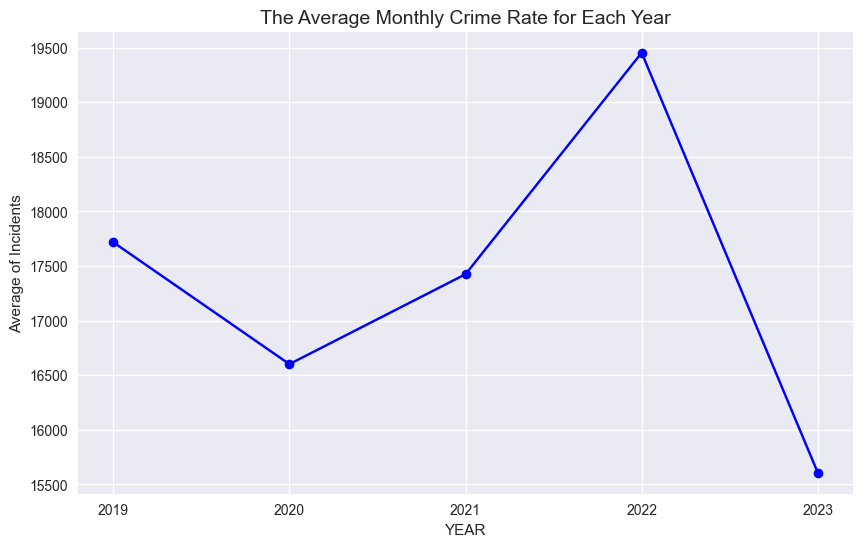

In [29]:
# The average number of crimes per month for each year
avg_crime = df.groupby([df['YEAR_OCC'], df['MONTH_OCC']]).size()
avg_crime_per_month = avg_crime.groupby(level= 0).mean().round(2)

plt.figure(figsize = (10, 6))
plt.plot(avg_crime_per_month.index.astype(int), avg_crime_per_month.values, marker = 'o', linestyle = '-', color = 'blue')
plt.title('The Average Monthly Crime Rate for Each Year', size = 14)
plt.xlabel('YEAR')
plt.ylabel('Average of Incidents')
plt.xticks(avg_crime_per_month.index.astype(int))
plt.show()

According to the graph showing the average monthly crimes of each year. By 2022, crimes per month were 19,454 times. And in 2023 is the lowest average monthly crime occurrence with 15,607 times (The 2023 data is calculated from January to May 6).

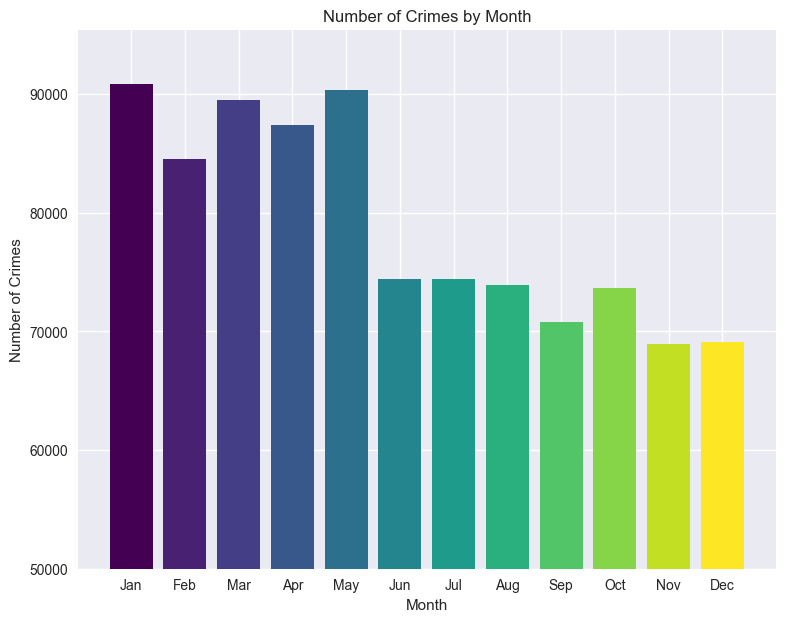

In [30]:
# Extract the month from the 'DATE OCC' column
df['Month'] = pd.to_datetime(df['DATE_OCC']).dt.month

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['Month'] = pd.Categorical(df['Month'], categories = range(1, 13), ordered = True).map(lambda x: months[x-1])

crimes_by_month = df['Month'].value_counts().sort_index()

# Create gradient colormap
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(crimes_by_month)))

plt.figure(figsize = (9, 7))
plt.bar(crimes_by_month.index, crimes_by_month.values, color = colors)
plt.title('Number of Crimes by Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.ylim(bottom = 50000)
plt.show()

The months with the highest crime are January, May, March and the months with the least crime are November, December and September.

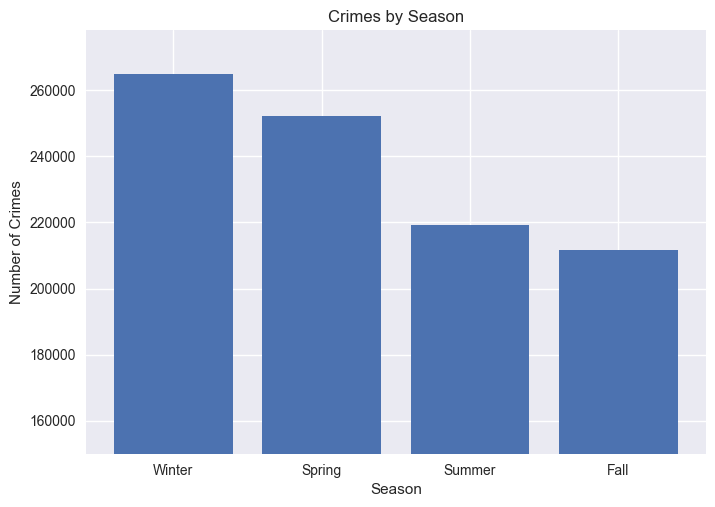

In [31]:
# Extract the month from the 'DATE OCC' column
df['Month'] = pd.to_datetime(df['DATE_OCC']).dt.month

df['Season'] = pd.cut(df['Month'], bins = [0, 3, 6, 9, 12], labels = ['Winter', 'Spring', 'Summer', 'Fall'])

crimes_by_season = df['Season'].value_counts().sort_index()

plt.bar(crimes_by_season.index, crimes_by_season.values)
plt.title('Crimes by Season')
plt.xlabel('Season')
plt.ylabel('Number of Crimes')
plt.ylim(bottom = 150000)
plt.show()

From the graph above shows the peak crime season is winter.

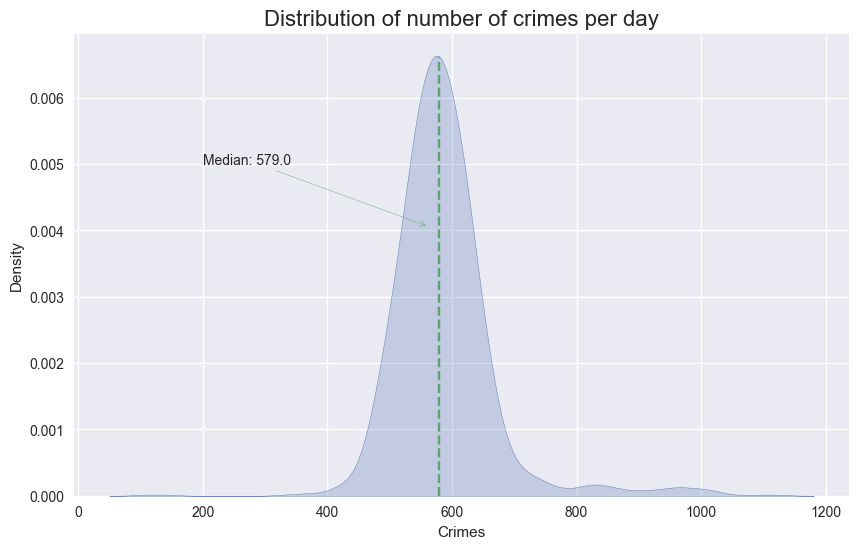

In [32]:
# KDE
col = sns.color_palette()

plt.figure(figsize = (10, 6))
data = df.groupby('DATE_OCC').count().iloc[ :, 0]
sns.kdeplot(data = data, shade = True)
plt.axvline(x = data.median(), ymax = 0.95, linestyle = '--', color = col[1])
plt.annotate(
    'Median: ' + str(data.median()),
    xy = (data.median(), 0.004),
    xytext = (200, 0.005),
    arrowprops = dict(arrowstyle = '->', color = col[1], shrinkB = 10))
plt.title(
    'Distribution of number of crimes per day', fontdict = {'fontsize': 16})
plt.xlabel('Crimes')
plt.ylabel('Density')
plt.show()

The "Distribution of number of crimes per day" indicates that there are 579 crimes committed in Los Angeles on average per day.

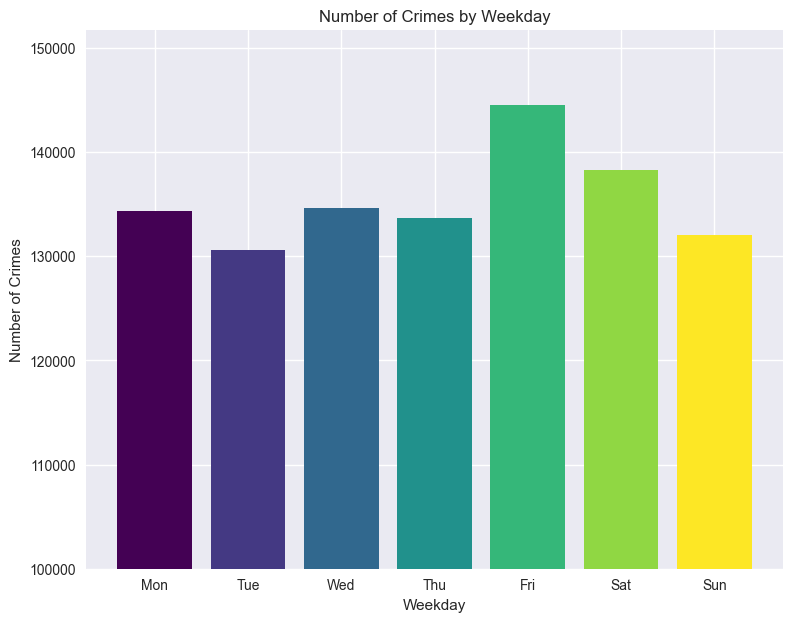

In [33]:
# Extract the weekday from the 'DATE OCC' column
df['Weekday'] = pd.to_datetime(df['DATE_OCC']).dt.weekday

weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df['Weekday'] = pd.Categorical(df['Weekday'], categories = range(7), ordered = True).map(lambda x: weekdays[x])

crimes_by_weekday = df['Weekday'].value_counts().sort_index()

# Create gradient colormap
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(crimes_by_weekday)))

plt.figure(figsize = (9, 7))
plt.bar(crimes_by_weekday.index, crimes_by_weekday.values, color = colors)
plt.title('Number of Crimes by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Crimes')
plt.ylim(bottom = 100000)
plt.show()


According to the plot, it shows the top 3 days with the most crimes are Friday, Saturday and Wednesday

In [34]:
df['Hour'] = pd.to_datetime(df['TIME_OCC']).dt.hour

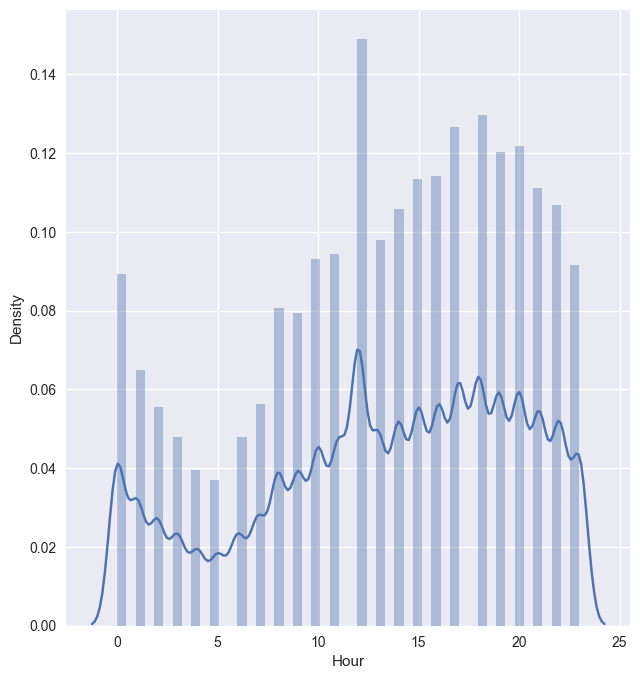

In [35]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.distplot(df['Hour'])
plt.show()

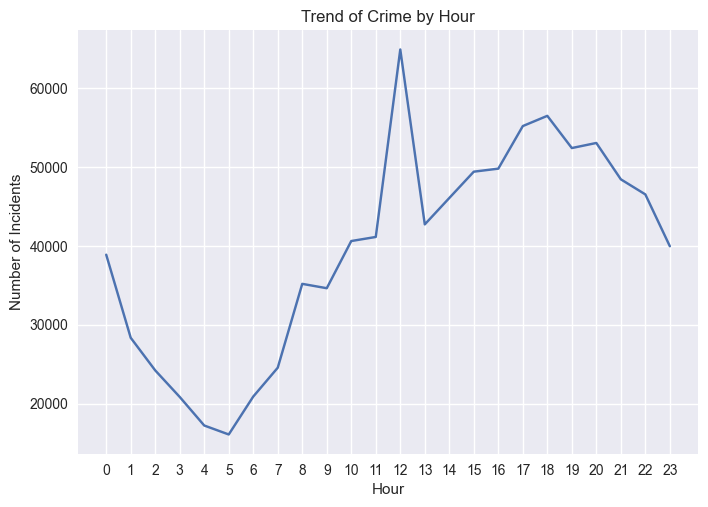

In [36]:
# Count the number of crimes by hour
crime_counts_by_hour = df['Hour'].value_counts().sort_index()

plt.plot(crime_counts_by_hour.index, crime_counts_by_hour.values)
plt.title('Trend of Crime by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Incidents')
plt.xticks(range(24))
plt.show()

From the plot, the time when crime is most often committed is 12:00 noon.